In [1]:
import os
import glob

import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imsave

In [11]:
def crop_patch(image, y, x, size=112):
    """Given an image, and a Y, X location, this function will extract the patch. 
        Default patch size is 112 x 112"""

    patch = image[abs(size - y) : abs(size + y), abs(size - x) : abs(size + x), :]
    
    return patch
    

In [12]:
data_root = "/home/azureuser/cloudfiles/code/Users/jordan.pierce/Data/Guam_Saipan/3653/"
image_path = data_root + "images/"
label_path = data_root + "CNet_Annotations.csv"
patch_path = data_root + "patches/"

df = pd.read_csv(label_path)

imported_df = df[df['Annotator'] == 'Imported']
robot_df = df[df['Annotator'] == 'robot']

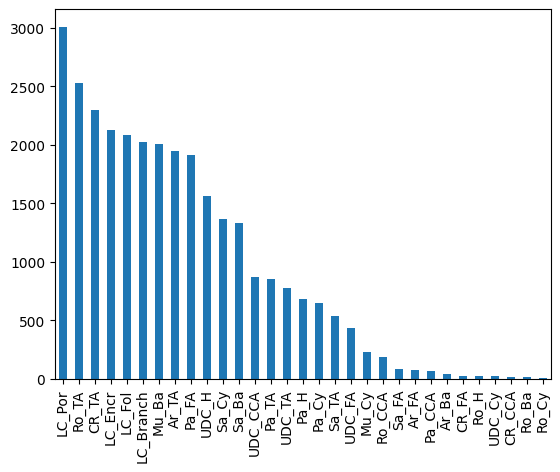

(79,) 29737


In [13]:
imported_df['Label'].value_counts().plot(kind='bar'); plt.show()
print(imported_df['Name'].unique().shape, len(imported_df))

In [14]:
updated_imported_df = []

for i, r in imported_df.iterrows():
    
    patch_name = "_" + r['Label'] + "_" + str(r['Row']) + "_" + str(r["Column"]) + ".png"
    patch_name = r["Name"].split(".")[0] + patch_name
    patch_name = patch_path + patch_name

    if os.path.exists(patch_name):
        continue

    image = image_path + r['Name']
    img = imread(image)
    patch = crop_patch(img, r['Row'], r['Column'])
    
    try:
        imsave(fname=patch_name, arr=patch)
    except:
        patch_name = "NULL"
    
    r['Patch_Name'] = patch_name
    
    updated_imported_df.append(r)
    
updated_imported_df = pd.DataFrame(updated_imported_df)
updated_imported_df.to_csv(data_root + "Updated_CNet_Annotations.csv")